In [6]:
import sqlite3
import time
import datetime
import random
from matplotlib import pyplot as plt
from datetime import datetime, timezone

from telebot.meteostat import Parsel, datetime_to_timestamp, setup
from telebot.meteostat import plot_temp_hum, plot_soil, plot_lum, statistics_for_period

In [7]:
conn = sqlite3.connect('mqtt.sqlite3')
c = conn.cursor()
print(c)

In [8]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
        

In [9]:
setup()

> За день получаем `60 * 60 * 24 / 2 = 43 200` измерений.
Для нормального отображения графика нужно не более 2000 точек (исходя из разрешения экрана FullHD)
> `43 200 / 2000 = 22`
Достаточно брать каждую 22-ю точку.
Для ровности можно брать каждую 30-ю, т.е.одно измерение в минуту

1651104000 1651190400
Строк за выбранный период:  4082
Шаг выборки: 40
Размер подмножества для анализа:  103
Plot every  9 th xtick


FileNotFoundError: [Errno 2] No such file or directory: '/run/user/1000/1.jpg'

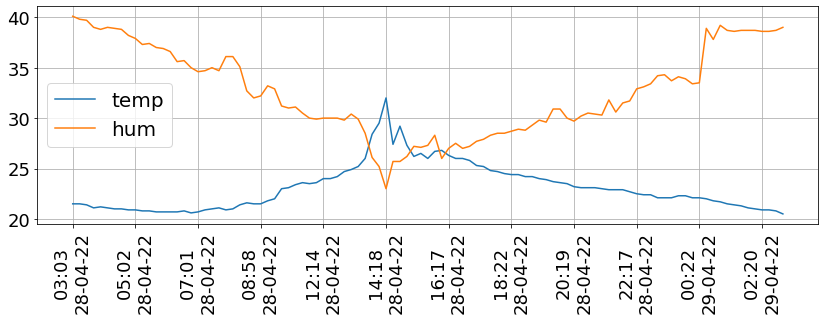

In [10]:
statistics_for_period( (28,4,2022), (29,4,2022), c)

In [ ]:
statistics_for_period( (29,4,2022), (30,4,2022) )

In [ ]:
def read_all_from_db():
    #c.execute('SELECT * FROM sensors_data')
    c.execute('SELECT temp, hum, soil, lum_1, lum_2, created_at FROM sensors_data')
    data = c.fetchall()
    
    p = Parsel(data)
    return p

#all_parsels = read_all_from_db()
#print("Всего строк к базе данных: ", len(all_parsels.temp))
#dt = datetime.fromtimestamp(all_parsels.ts[0])
#print(dt)
#print(dt.strftime("%H:%M"))

In [ ]:
#plot_lum(all_parsels, 120, 12)

In [ ]:
#plot_temp_hum(all_parsels, 120, 12)

In [ ]:
#plot_soil(all_parsels, 120, 12)

,id,temp,hum,soil,lum_1,lum_2,created_at
0,1,26.0,35.2,4,517,627,2022-04-27 13:22:02
1,2,26.1,35.3,4,517,627,2022-04-27 13:22:04
2,3,26.0,35.2,4,517,627,2022-04-27 13:22:06
3,4,26.0,35.2,4,517,626,2022-04-27 13:22:08
4,5,26.0,35.2,4,516,626,2022-04-27 13:22:10
...,...,...,...,...,...,...,...
210512,210513,28.3,29.6,43,517,558,2022-05-02 13:24:48
210513,210514,28.3,29.6,43,520,559,2022-05-02 13:24:50
210514,210515,28.3,29.6,43,527,561,2022-05-02 13:24:52
210515,210516,28.2,29.6,43,534,563,2022-05-02 13:24:54


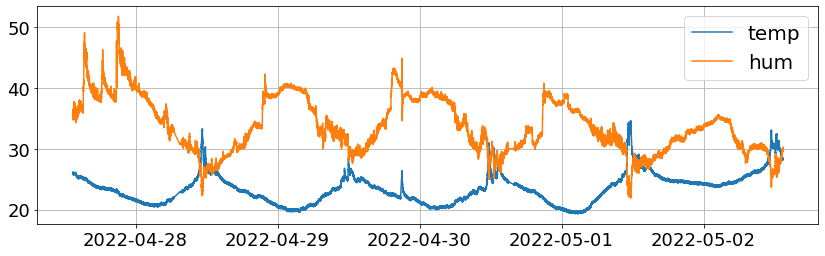

In [26]:
import pandas as pd

df = pd.read_sql("select * from sensors_data", con=conn)
df['created_at'] = pd.to_datetime(df['created_at'],unit='s')

display(df)

#ax = df.plot() 
#df.plot('created_at', 'temp')

plt.plot(df['created_at'], df['temp'], label='temp')
plt.plot(df['created_at'], df['hum'], label='hum')
plt.legend()

<AxesSubplot:xlabel='created_at'>

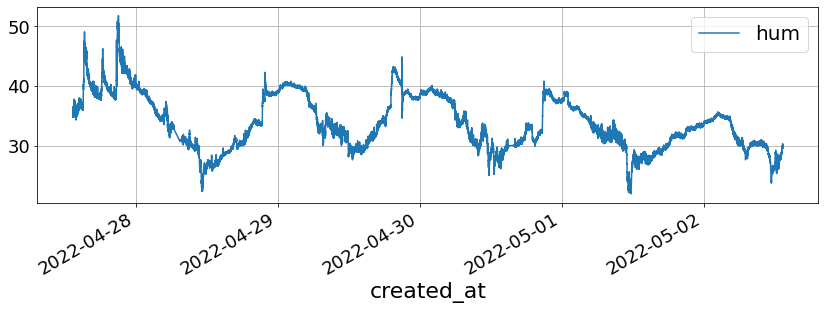

In [20]:
df.plot('created_at', 'hum')